# **Banking Classification Project Using Neural Network**

---



# **Team Member**

*   Aljohara Adawood

LinkedIn:https://www.linkedin.com/in/aljohara-aldawood-27951426b/

GitHub:https://github.com/jowharah0

*   Reem Alhassoun

LinkedIn: https://www.linkedin.com/in/reem-alhassoun-b08539217/

GitHub: https://github.com/Reem-has

*   Mona Alrougi

LinkedIn: https://www.linkedin.com/in/mona-alrougi-209815218/

GitHub: https://github.com/MonaHalrougi


---



# **Dataset Description**


The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed. The dataset contains 32950 instance with 16 features.

Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Dataset Link: https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification/data


---

#**Data Preprocessing**

1. Importing Libraries

Import necessary Python libraries for data analysis and preprocessing.

2. Loading the Dataset

Load the dataset into a pandas DataFrame for further analysis.




---




In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
Train= pd.read_csv('/content/new_train.csv')

In [ ]:
Train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
Train.shape

(32950, 16)

In [ ]:
Train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [ ]:
# Number of unique values in each column
for i in Train.columns:
    print(f'No of unique value in {i} is: {Train[i].nunique()}')

No of unique value in age is: 75
No of unique value in job is: 12
No of unique value in marital is: 4
No of unique value in education is: 8
No of unique value in default is: 3
No of unique value in housing is: 3
No of unique value in loan is: 3
No of unique value in contact is: 2
No of unique value in month is: 10
No of unique value in day_of_week is: 5
No of unique value in duration is: 1467
No of unique value in campaign is: 40
No of unique value in pdays is: 27
No of unique value in previous is: 8
No of unique value in poutcome is: 3
No of unique value in y is: 2


In [ ]:
# Unique values present in each feature
for i in Train.columns:
    print(f'Unique values in {i} are: \n{Train[i].unique()}')
    print('*'*100)


Unique values in age are: 
[49 37 78 36 59 29 26 30 50 33 44 32 43 56 40 47 34 46 39 41 55 38 63 23
 48 53 35 51 71 58 21 45 25 77 28 52 80 57 22 60 27 24 31 42 54 81 64 79
 20 76 82 19 68 65 73 66 85 74 61 86 69 18 83 88 70 87 84 75 62 72 67 89
 17 91 98]
****************************************************************************************************
Unique values in job are: 
['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']
****************************************************************************************************
Unique values in marital are: 
['married' 'divorced' 'single' 'unknown']
****************************************************************************************************
Unique values in education are: 
['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' 'illiterate']
******************************************

# **EDA (Exploratory Data Analysis)**


---



In [ ]:
#Check for Missing Values
Train.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [ ]:
# Dropping Duplicate Rows
Train.duplicated().sum()

8

In [ ]:
Train.drop_duplicates(inplace=True)

In [ ]:
Train.duplicated().sum()

0

In [ ]:
Train.shape

(32942, 16)

In [ ]:
Train.describe()

,age,duration,campaign,pdays,previous
count,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000
mean,40.012810,258.159614,2.560804,962.043440,0.174762
std,10.403035,258.995259,2.752579,187.973035,0.499078
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


# **Data Preparation**


1. Converting the target variable to numerical values.
2. Perform ordinal encoding and one-hot encoding for each column.
---







In [ ]:
# Converting the target variable to numercal values
Train['y'] = np.where(Train['y'] == 'yes',1,0)

In [ ]:
Train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,0
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,0
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,1
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,0
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# Drop 'month' and 'day_of_week' columns
Train = Train.drop(['month', 'day_of_week'], axis=1)

In [ ]:
# Perform ordinal encoding on 'education' column
education_data = Train[['education']]
encoder = OrdinalEncoder()
encoded_education = encoder.fit_transform(education_data)
Train['education'] = encoded_education

In [ ]:
# Perform ordinal encoding on 'job' column
job_data = Train[['job']]
encoder = OrdinalEncoder()
encoded_job = encoder.fit_transform(job_data)
Train['job'] = encoded_job

In [ ]:
# Perform one-hot encoding on selected columns
columns_to_encode = ['marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
encoded_df = pd.get_dummies(Train[columns_to_encode], drop_first=True)
encoded_df = encoded_df.astype(int)  # Convert boolean values to integers (0 and 1)
Train = pd.concat([Train, encoded_df], axis=1)
Train = Train.drop(columns=columns_to_encode)


In [ ]:
# Print the unique values in all columns
for column in Train.columns:
    print(f"Unique values in {column} are:")
    print(Train[column].unique())
    print("**************************************************")

Unique values in age are:
[49 37 78 36 59 29 26 30 50 33 44 32 43 56 40 47 34 46 39 41 55 38 63 23
 48 53 35 51 71 58 21 45 25 77 28 52 80 57 22 60 27 24 31 42 54 81 64 79
 20 76 82 19 68 65 73 66 85 74 61 86 69 18 83 88 70 87 84 75 62 72 67 89
 17 91 98]
**************************************************
Unique values in job are:
[ 1.  2.  5.  0.  8.  7.  9.  6.  4. 10. 11.  3.]
**************************************************
Unique values in education are:
[2. 6. 0. 3. 5. 7. 1. 4.]
**************************************************
Unique values in duration are:
[ 227  202 1148 ... 1882 1666 1434]
**************************************************
Unique values in campaign are:
[ 4  2  1  5  9  3  7  6 13  8 12 10 19 11 31 17 16 29 43 20 14 21 35 15
 33 28 22 25 18 23 27 26 24 34 32 37 30 42 40 56]
**************************************************
Unique values in pdays are:
[999   3   6  10   8   4   9  11   7  12   5   2  22  25  15  17   0  14
  13   1  16  18  19  21  20  27 

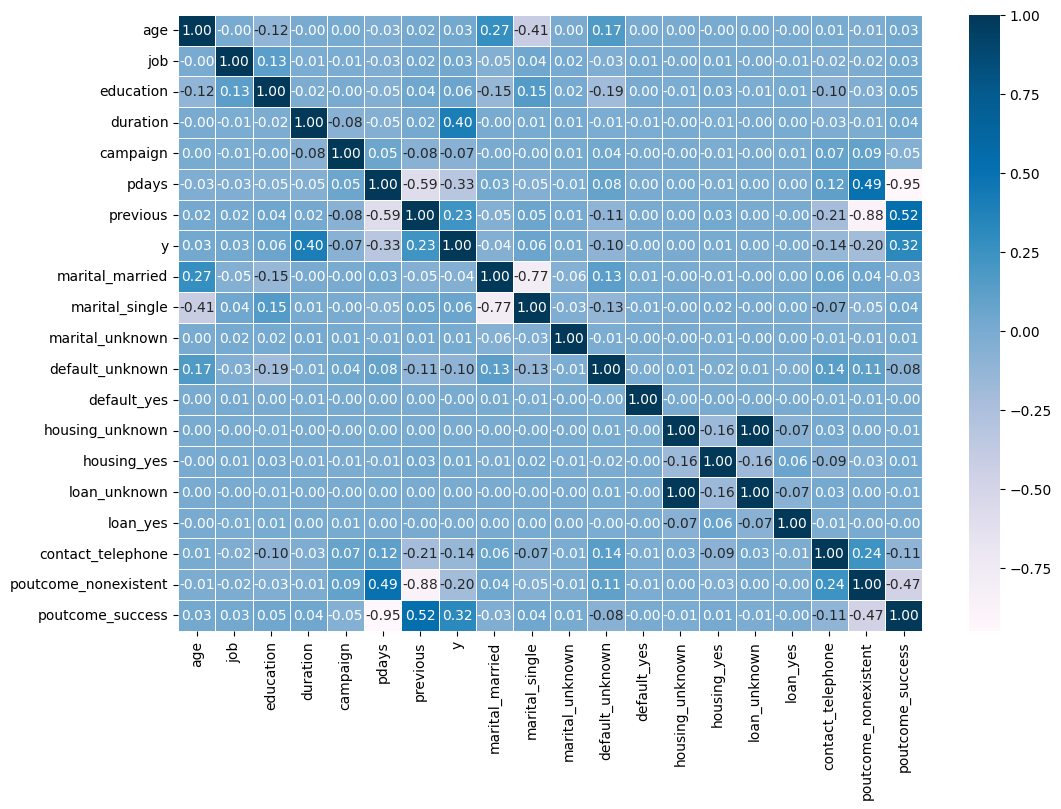

In [ ]:
# Display a heatmap to show the relationship between features.
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(Train.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()


In [ ]:
# Result of the correlation in descending order.
corr = Train.corr()
corr["previous"].sort_values()

poutcome_nonexistent   -0.876525
pdays                  -0.589596
contact_telephone      -0.212701
default_unknown        -0.106607
campaign               -0.079079
marital_married        -0.046667
loan_yes               -0.002171
housing_unknown         0.001937
loan_unknown            0.001937
default_yes             0.003032
marital_unknown         0.011843
age                     0.020717
duration                0.022496
job                     0.024129
housing_yes             0.026451
education               0.041648
marital_single          0.051885
y                       0.229735
poutcome_success        0.522915
previous                1.000000
Name: previous, dtype: float64

In [ ]:
# Drop features
dfmodel = Train.drop(['campaign','duration'], axis = 1,inplace=True)

we are dropped the 'campaign' feature due to redundancy or limited impact and
also we drop the 'duration' feature to avoid data leakage and ensure practicality for real-time predictions.

In [ ]:
# Check for Outliers
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor()
y_pred = clf.fit_predict(Train)

x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()

len(outlier_index)

1615

In [ ]:
# Split the dataset into features=x and target=y
x = Train.drop(['y'], axis=1)
x

,age,job,education,pdays,previous,marital_married,marital_single,marital_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,49,1.0,2.0,999,0,1,0,0,1,0,0,0,0,0,0,1,0
1,37,2.0,6.0,999,1,1,0,0,0,0,0,0,0,0,1,0,0
2,78,5.0,0.0,999,0,1,0,0,0,0,0,0,0,0,0,1,0
3,36,0.0,6.0,999,0,1,0,0,0,0,0,1,0,0,1,1,0
4,59,5.0,6.0,999,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7.0,3.0,999,0,0,1,0,0,0,0,1,0,0,0,1,0
32946,52,9.0,5.0,999,1,1,0,0,0,0,0,1,0,0,0,0,0
32947,54,0.0,2.0,999,0,1,0,0,0,0,0,0,0,1,0,1,0
32948,29,0.0,6.0,999,0,1,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
y = Train['y']
y

0        0
1        0
2        1
3        0
4        0
        ..
32945    0
32946    0
32947    0
32948    0
32949    0
Name: y, Length: 32942, dtype: int64

In [ ]:
y.value_counts()

y
0    29230
1     3712
Name: count, dtype: int64

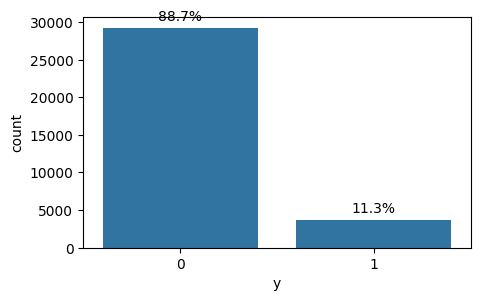

In [ ]:
plt.figure(figsize = (5,3))
ax = sns.countplot(data = Train, x = 'y')
ax.bar_label(ax.containers[0], padding = 3, fmt = lambda x: f'{(x/Train["y"].count())*100:0.1f}%')
plt.show()

We could tell from the above visual that about 88.7% of the customers have not opted the term deposit while only 11.3% have opted for it.

So clearly we have an imbalanced dataset

# **Model Building**

---



In [ ]:
pip install imbalanced-learn

**Worst model**

In [ ]:
import keras
import keras.layers as L
from sklearn.model_selection import train_test_split
from keras.losses import binary_crossentropy
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=123)

# Define and compile the model
model = keras.models.Sequential([
    L.Input(shape=(17,)),
    L.Dense(units=64, activation='relu'),
    L.Dense(units=32, activation='relu'),
    L.Dense(units=16, activation='relu'),
    L.Dense(units=1, activation='sigmoid'),
])

model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'],
)

model.summary()

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                1152      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3777 (14.75 KB)
Trainable params: 3777 (14.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
468/468 [==============================] - 2s 2ms/step - loss: 0.8770 - accuracy: 0.5983 - val_loss: 0.6835 - val_accuracy: 0.5459
Epoch 2/10

**Best model**

In [ ]:
#import libraries
import keras
import keras.layers as L
from sklearn.model_selection import train_test_split
from keras.losses import binary_crossentropy
from sklearn.model_selection import cross_val_predict,train_test_split
from imblearn.over_sampling import SMOTE
from keras.layers import BatchNormalization


# Split the resampled data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Define and compile the model
model = keras.models.Sequential([
    L.Input(shape=(17,)),
    L.Dense(units=32, activation='relu'),
    L.Dense(units=16, activation='relu'),
    L.Dense(units=8, activation='relu'),
    BatchNormalization(),
    L.Dense(units=1, activation='sigmoid'),

])

model.compile(
      # Binary cross-entropy loss function for binary classification
    loss='binary_crossentropy',
      # Adam optimizer with a learning rate of 0.001
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      # Monitor accuracy during training
    metrics=['accuracy'],
)

# Display model architecture summary
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                576       
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 batch_normalization_2 (Bat  (None, 8)                 32        
 chNormalization)                                                
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1265 (4.94 KB)
Non-trainable params: 16 (64.00 Byte)
____________________

In [ ]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    batch_size=32
    epochs=10,
    validation_split=0.2,)

Epoch 1/10
659/659 [==============================] - 2s 2ms/step - loss: 0.4177 - accuracy: 0.8881 - val_loss: 0.3530 - val_accuracy: 0.8932
Epoch 2/10
659/659 [==============================] - 1s 2ms/step - loss: 0.3178 - accuracy: 0.8960 - val_loss: 0.5739 - val_accuracy: 0.8932
Epoch 3/10
659/659 [==============================] - 1s 2ms/step - loss: 0.3179 - accuracy: 0.8942 - val_loss: 0.3428 - val_accuracy: 0.8938
Epoch 4/10
659/659 [==============================] - 1s 2ms/step - loss: 0.3169 - accuracy: 0.8960 - val_loss: 0.3316 - val_accuracy: 0.8938
Epoch 5/10
659/659 [==============================] - 1s 2ms/step - loss: 0.3176 - accuracy: 0.8952 - val_loss: 0.3343 - val_accuracy: 0.8938
Epoch 6/10
659/659 [==============================] - 1s 2ms/step - loss: 0.3176 - accuracy: 0.8952 - val_loss: 0.3326 - val_accuracy: 0.8938
Epoch 7/10
659/659 [==============================] - 1s 2ms/step - loss: 0.3183 - accuracy: 0.8952 - val_loss: 0.3316 - val_accuracy: 0.8938
Epoch 

# **Evaluation and prediction**

---



In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

206/206 [==============================] - 0s 1ms/step - loss: 0.3432 - accuracy: 0.8959


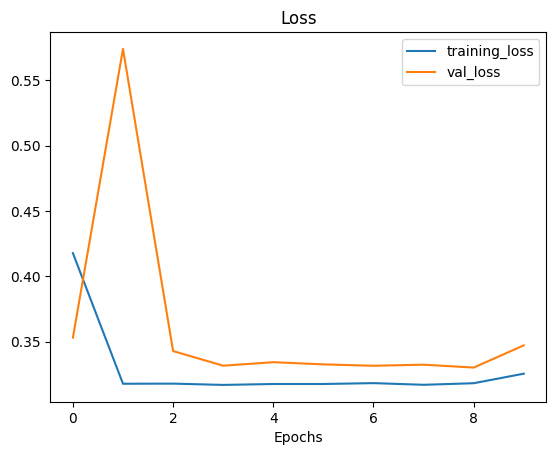

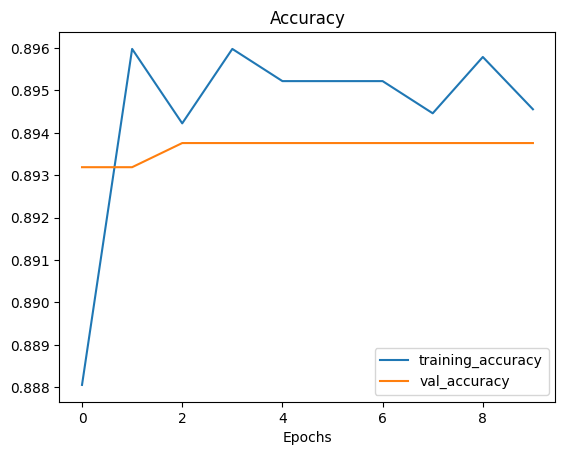

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

epochs = range(len(history.history['loss']))

# Plot loss
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report

# Evaluate the model on the training set
y_train_pred = model.predict(X_train)
y_train_pred = (y_train_pred > 0.5).astype(int)

# Print classification report for training set
train_report = classification_report(y_train, y_train_pred)
print("Training Set Classification Report:")
print(train_report)

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Print classification report for test set
test_report = classification_report(y_test, y_test_pred)
print("Test Set Classification Report:")
print(test_report)

824/824 [==============================] - 1s 908us/step
Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     23399
           1       0.63      0.21      0.31      2954

    accuracy                           0.90     26353
   macro avg       0.77      0.60      0.63     26353
weighted avg       0.88      0.90      0.87     26353

206/206 [==============================] - 0s 884us/step
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5831
           1       0.64      0.22      0.32       758

    accuracy                           0.90      6589
   macro avg       0.77      0.60      0.63      6589
weighted avg       0.88      0.90      0.87      6589



# **Conclusion**

In conclusion, the second code snippet employs a refined approach to model construction and preprocessing techniques, resulting in enhanced accuracy. By simplifying the architecture, introducing batch normalization, and strategically applying SMOTE to address class imbalance, the model shows improved performance, particularly in learning from minority classes. These adjustments signify the importance of thoughtful design decisions and effective data preprocessing in optimizing machine learning models for better generalization and predictive capabilities.


---

